In [2]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [3]:
IMAGE_SIZE=[224,224]
train_path = '/content/drive/MyDrive/train'
val_path = '/content/drive/MyDrive/val'

In [5]:
# resnet = ResNet50(input_shape=IMAGE_SIZE + [3] ,weights='imagenet',include_top=False)
inception = InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
 

87924736/87910968 [==============================] - 1s 0us/step


In [7]:
for layer in inception.layers:
  layer.trainable = False

In [8]:
x=Flatten()(inception.output)

In [10]:
folders = glob('/content/drive/MyDrive/train/*')

In [11]:
prediction = Dense(len(folders),activation='softmax')(x)

In [12]:
model = Model(inputs=inception.input,outputs=prediction)

In [14]:
# x=Flatten()(resnet.output)
model = Model(inputs=inception.input, outputs=prediction)

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [16]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/train/',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [19]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/val',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 324 images belonging to 4 classes.


In [21]:

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
61/61 [==============================] - 847s 14s/step - loss: 3.0960 - accuracy: 0.7248 - val_loss: 1.1065 - val_accuracy: 0.7932
Epoch 2/50
61/61 [==============================] - 46s 747ms/step - loss: 0.7253 - accuracy: 0.8811 - val_loss: 0.6830 - val_accuracy: 0.8704
Epoch 3/50
61/61 [==============================] - 46s 748ms/step - loss: 0.5161 - accuracy: 0.9052 - val_loss: 0.7872 - val_accuracy: 0.8457
Epoch 4/50
61/61 [==============================] - 45s 742ms/step - loss: 0.6560 - accuracy: 0.8913 - val_loss: 0.3858 - val_accuracy: 0.9352
Epoch 5/50
61/61 [==============================] - 45s 741ms/step - loss: 0.5818 - accuracy: 0.9175 - val_loss: 0.6561 - val_accuracy: 0.8796
Epoch 6/50
61/61 [==============================] - 45s 736ms/step - loss: 0.4342 - accuracy: 0.9288 - val_loss: 0.5606 - val_accuracy: 0.9290
Epoch 7/50
61/61 [==============================] - 45s 738ms/step - loss: 0.3146 - accuracy: 0.9441 - val_loss: 0.5045 - val_accuracy: 0.9290


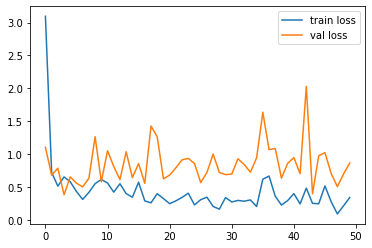

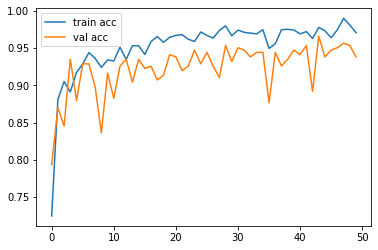

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')